# NLP & Classification Group Project

### Project Title: News Article Category Predictions
#### Done By: Amogelang Mogwane, Chris Phillip, Moosa Molibeli & Tiisetso Gabaza

© ExploreAI 2024

----

![NewsPaper](newspaper1.jpg)

<a id="cont"></a>
## Table of Contents

<a href=#one>1. Background Context</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Data Collection and Description</a>

<a href=#four>4. Loading Data </a>

<a href=#five>5. Data Cleaning and PreProcessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Modeling</a>

<a href=#eight>8. Evaluation and Validation</a>

<a href=#nine>9. Final Model</a>

<a href=#ten>10. Conclusion and Future Work</a>

<a href=#eleven>11. References</a>

---
<a id="one"></a>
## Background Context
<a href=#cont>Back to Table of Contents</a>

From the inception of printed newspapers, every article has been assigned to a specific section. While many aspects of the newspaper industry have evolved—ranging from ink and paper types to distribution methods—the practice of categorizing news has persisted across generations, extending into digital formats. Newspaper articles cover a broad spectrum of topics, including politics, sports, and entertainment. Historically, categorization was primarily a manual process, but advancements in technology now allow for automated classification with minimal effort.

This project aims to design and develop an application that predicts the categories of news articles intended for publication. By utilizing classification algorithms, we will analyze the content of articles to determine their respective genres. The proposed algorithm will not only classify existing topics but also adapt to new topics as they emerge in the content. While the algorithm is extendable to multiple languages, this paper will primarily focus on English.

In the realm of news article classification, multi-label text classification poses a significant challenge. Our objective is to assign one or more category labels to each article. For each category, classifiers will provide binary responses—either "yes" or "no"—indicating whether a specific category applies to the given test data. This approach utilizes binary classifiers, and we will implement several standard algorithms, including K-Nearest Neighbours, Support Vector Machines, and Logistic Regression, which are commonly used for binary classification. We will evaluate these three approaches and select the best model based on predetermined parameters for predicting news categories.

A robust category classification algorithm for news articles must achieve high precision while remaining easily updatable. Given the continuous evolution of news topics and events, the ability to seamlessly add new categories to the classifier is essential.

![News Articles](newspaper2.jpg)

---
<a id="two"></a>
## Importing Packages
<a href=#cont>Back to Table of Contents</a>

**Please Note:**
*The below are all the libraries I believe I will need for this project. This list will be adjusted as needed throughout the project*

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [41]:
# please run this code if you do not have wordcloud installed in your environment
#!pip install wordcloud

In [42]:
# please run this code if you do not have imbalanced-learn installed in your environment
#pip install imbalanced-learn

In [43]:
# please run this code if you do not have xgboost installed in your environment
#!pip install xgboost

---
<a id="three"></a>
## Data Collection and Description
<a href=#cont>Back to Table of Contents</a>

This project utilizes a news dataset containing articles categorized into five distinct groups: Sports, Business, Entertainment, Education, and Technology. The dataset is randomly partitioned into training and testing sets, with the challenge of developing a classification model to predict the category of each news article.

The training dataset comprises 5,520 records across five columns, while the testing dataset consists of 2,000 observations with the same column structure. The columns included in the dataset are: 'index', 'headlines', 'description', 'content', 'url', and 'category'. The target variable for prediction is the 'category' column. Other columns will either be discarded (e.g., the 'url' column) or combined to create a single content column for the articles.

---
<a id="four"></a>
## Loading Data
<a href=#cont>Back to Table of Contents</a>

In [101]:
# loading our training and our testing data sets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [102]:
# getting a sense of the training data from the first 5 observations
train_df.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [103]:
# understanding the structure of the training dataset
train_df.shape

(5520, 5)

In [104]:
# understanding the structure of the testing dataset
test_df.shape

(2000, 5)

---
<a id="five"></a>
## Data Cleaning and PreProcessing
<a href=#cont>Back to Table of Contents</a>

Data cleaning is an essential first step in any data-driven project, ensuring the dataset is accurate, consistent, and ready for analysis. For our news article classification project, this involves several processes to improve data quality.

We will start by creating a copy of the training dataset. This way, any major changes can be made while preserving the original for reference.
All the steps we do to our training dataset, we will also apply to our testing dataset

In [105]:
# creating a copy of the training dataframe
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

Next, we'll address any missing or incomplete data. Missing values can distort results and lead to inaccurate conclusions, so it's crucial to identify and handle these gaps through imputation, removal, or replacement.

In [106]:
# checking for missing values
train_df_copy.isnull().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [107]:
# checking for missing values
test_df_copy.isnull().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

Since there are no missing values, we can confidently move on to the next phase of the project.

Next, we will address any duplicate records to avoid bias in model training. Ensuring each article is unique is essential for accurately training the classification model.

In [108]:
# dropping any duplicates that might exist
train_df_copy.drop_duplicates(inplace=True)

train_df_copy.shape

(5520, 5)

In [109]:
# dropping any duplicates that might exist
test_df_copy.drop_duplicates(inplace=True)

test_df_copy.shape

(2000, 5)

The structure of the training dataset remains intact, confirming there are no duplicates. We can proceed with confidence, knowing our dataset is unbiased for modeling.

Next, we will remove the URL column, as it does not add value to our news category predictions and is considered redundant.

In [110]:
# removing redundant url column 
train_df_copy.drop(columns="url",inplace=True)
test_df_copy.drop(columns="url",inplace=True)

train_df_copy.head()

,headlines,description,content,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business


Now that we've removed the URL column, we can map the category column for classification. Currently, the categories are in text format, so converting them to integers will allow us to use classification algorithms. We will define a function to facilitate this conversion.

In [111]:
# mapping category column for classification
def map_category(category):
    category_map = {
        'sports': 0,
        'business': 1,
        'entertainment': 2,
        'education': 3,
        'technology': 4
    }
    return category_map.get(category, -1)
train_df_copy['Category'] = train_df_copy['category'].apply(map_category)
test_df_copy['Category'] = test_df_copy['category'].apply(map_category)

In [112]:
train_df_copy.head()

,headlines,description,content,category,Category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business,1
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business,1
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business,1
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business,1
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business,1


Now that we have created a new category column, the old one is redundant and can be removed in order to keep the dataframe clean and of good quality.

In [113]:
train_df_copy.drop('category', axis=1, inplace=True)
test_df_copy.drop('category', axis=1, inplace=True)

In [114]:
train_df_copy.head()

,headlines,description,content,Category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,1
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,1
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,1
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,1
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,1


Next, we will merge relevant columns, such as 'headlines,' 'description,' and 'content,' to create a comprehensive representation of each article. This consolidation will enhance our analysis and improve the model's understanding of the articles' context.

In [115]:
# joining the columns to create one and then dropping the redundant columns
train_df_copy['Content'] = train_df_copy['headlines'] + ' ' + train_df_copy['description'] + ' ' + train_df_copy['content']
test_df_copy['Content'] = test_df_copy['headlines'] + ' ' + test_df_copy['description'] + ' ' + test_df_copy['content']

train_df_copy.drop(['headlines', 'description', 'content'], axis=1, inplace=True)
test_df_copy.drop(['headlines', 'description', 'content'], axis=1, inplace=True)

In [116]:
train_df_copy.head()

,Category,Content
0,1,RBI revises definition of politically-exposed ...
1,1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...
2,1,"Akasa Air ‘well capitalised’, can grow much fa..."
3,1,India’s current account deficit declines sharp...
4,1,"States borrowing cost soars to 7.68%, highest ..."


Lastly, we will standardize the text data by converting everything to lowercase for consistency, removing punctuation, eliminating stop words that add little meaning, and lemmatizing the dataset. These steps will streamline the data, making it easier for classification algorithms to process effectively. Lemmatization will reduce words to their base forms, enhancing classification across all observations.

We will define a function to perform these final cleanup steps on our content column.

In [117]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# text cleaning 
def clean_text(text):
    
    text = re.sub(r'\W', ' ', text)    # removing special characters
    text = text.lower()    # lowercasing the text
    tokens = word_tokenize(text)   # tokenizing the text
    
    # removing stop words and lemmatizing to reduce the words to base words
    lemmatizer = WordNetLemmatizer() #intiation
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [
        lemmatizer.lemmatize(token) for token in tokens if token not in stop_words
    ]

    # joining tokens back to string
    return ' '.join(cleaned_tokens)

train_df_copy['Cleaned_Content'] = train_df_copy['Content'].apply(clean_text)
test_df_copy['Cleaned_Content'] = train_df_copy['Content'].apply(clean_text)

In [118]:
train_df_copy.head()

,Category,Content,Cleaned_Content
0,1,RBI revises definition of politically-exposed ...,rbi revise definition politically exposed pers...
1,1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,ndtv q2 net profit fall 57 4 r 5 55 crore impa...
2,1,"Akasa Air ‘well capitalised’, can grow much fa...",akasa air well capitalised grow much faster ce...
3,1,India’s current account deficit declines sharp...,india current account deficit decline sharply ...
4,1,"States borrowing cost soars to 7.68%, highest ...",state borrowing cost soar 7 68 highest far fis...


We will close off this section by removing the 'Content' column which is now redundant. 

In [119]:
train_df_copy.drop('Content', axis=1, inplace=True)
test_df_copy.drop('Content', axis=1, inplace=True)

train_df_copy.head()

,Category,Cleaned_Content
0,1,rbi revise definition politically exposed pers...
1,1,ndtv q2 net profit fall 57 4 r 5 55 crore impa...
2,1,akasa air well capitalised grow much faster ce...
3,1,india current account deficit decline sharply ...
4,1,state borrowing cost soar 7 68 highest far fis...


By applying these data cleaning techniques, we aim to build a high-quality dataset that improves the reliability of our classification model, ultimately leading to more accurate predictions of news categories.

---
<a id="six"></a>
## Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis (EDA) is a crucial step in our news classification project, allowing us to better understand the dataset's characteristics and distributions. In this phase, we will focus firstly on visualizing the distribution of news categories to identify any imbalances. This initial visualization will provide insights into how the categories are spread across the dataset.

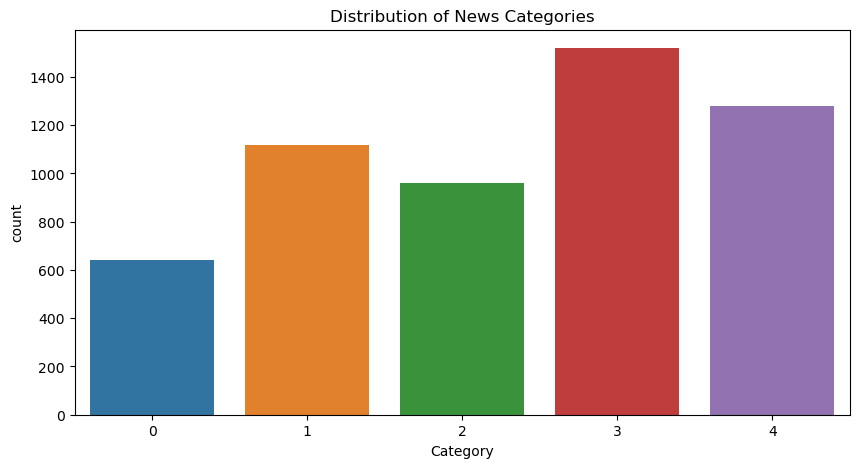

In [120]:
# getting the distribution of the categories
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df_copy, x='Category')
plt.title('Distribution of News Categories')
plt.show()

From the visualisation, we can clearly note some imbalances in the spread of our news categories. This can lead to a biased models that perform well on majority classes but poorly on minority classes. A balanced dataset generally helps the model generalize better, leading to improved performance in real-world applications where class distributions may vary.

Let us now numerically verify the counts for each category. Understanding the extent of this imbalance is essential for implementing effective solutions.

In [121]:
# verifying the count of each category
train_df_copy['Category'].value_counts()

Category
3    1520
4    1280
1    1120
2     960
0     640
Name: count, dtype: int64

The above further verifies the imbalance of the categories in our training dataset. 

It might be necessary to use Synthetic Data Generation which uses techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples for minority classes.

The counts are not extremely skewed, but Category 0 has significantly fewer instances than the others. The difference between the largest (Category 3) and the smallest (Category 0) is 880 instances. While the other categories are relatively balanced, Category 0 might be at risk of being underrepresented, which could lead to poor model performance.

Due to the underrepresentation of Category 0, we will apply a SMOTE technique

In [125]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTEENN 
from sklearn.model_selection import train_test_split

# preparing our features and target from the training and testing datasets
X_train = train_df_copy['Cleaned_Content']  # feature train column
y_train = train_df_copy['Category']  # target train column
X_test = test_df_copy['Cleaned_Content']  # feature column for testing
y_test = test_df_copy['Category']  # target column for testing

# splitting the training dataset into train and test data using a 20/80 split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train,  # Features
    y_train,  # Target
    test_size=0.2,  # 20% for validation, 80% for training
    random_state=42,  # For reproducibility
    stratify=train_df_copy['Category']  # Ensures the split maintains the class distribution
)

# vectorising the training data
vectorizer = TfidfVectorizer() # this captures bi & tri-grams
X_train_vec = vectorizer.fit_transform(X_train_split)
X_val_vec = vectorizer.transform(X_val_split)  # transforming the test data

# applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vec, y_train_split)

#combining SMOTE with random sampling on training data
#smote_enn = SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train_vec, y_train)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

Category
4    1216
3    1216
1    1216
2    1216
0    1216
Name: count, dtype: int64


Vectorisation is a crucial step in preparing text data for machine learning models. In machine learning, models require rumeric input, so the vectorisation transform the text data into a numerical format to be processed. Vectorisation methods, like TF-IDF (Term Frequency-Inverse Document Frequency) we used above, converts text into vectors that represent the presence or frequency of words or terms. This allows any models to analyze patterns based on these features. The TF-IDF technique can also help in reducing the number of dimensions by focusing on the most informative terms, which can improve model performance and training speed.

We will now store the vectorised model. This will ensure consistency when applying our Streamlit app. When we vectorised our data, we created a specific mapping of text features. Saving this model will ensure we continue to use the same instance in our Streamlit app when we apply it to our project. 

In [66]:
# saving vectoriser to be used for streamlit app later
import joblib  # For loading the model
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

Furthermore, we will create word clouds for each category to visualize the most frequently occurring terms. By defining a function to generate these word clouds, we can gain additional insights into the key topics and themes present within each category.

In [126]:
# defining a function to generate word clouds for each category
from wordcloud import WordCloud

def generate_word_clouds(df, category_column='Category', text_column='Cleaned_Content'):
    categories = df[category_column].unique()  # getting unique categories

    # ensureing there are no more than 4 categories
    if len(categories) > 5:
        raise ValueError("This function supports up to 4 categories only.")
        
    plt.figure(figsize=(15, 10))  # setting figure size

    for i, category in enumerate(categories):
        plt.subplot(3, 2, i + 1)  # creating a subplot for each category
        # combining all text for the specific category
        text = ' '.join(df[df[category_column] == category][text_column])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axis
        plt.title(category)  # Set the title to the category

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

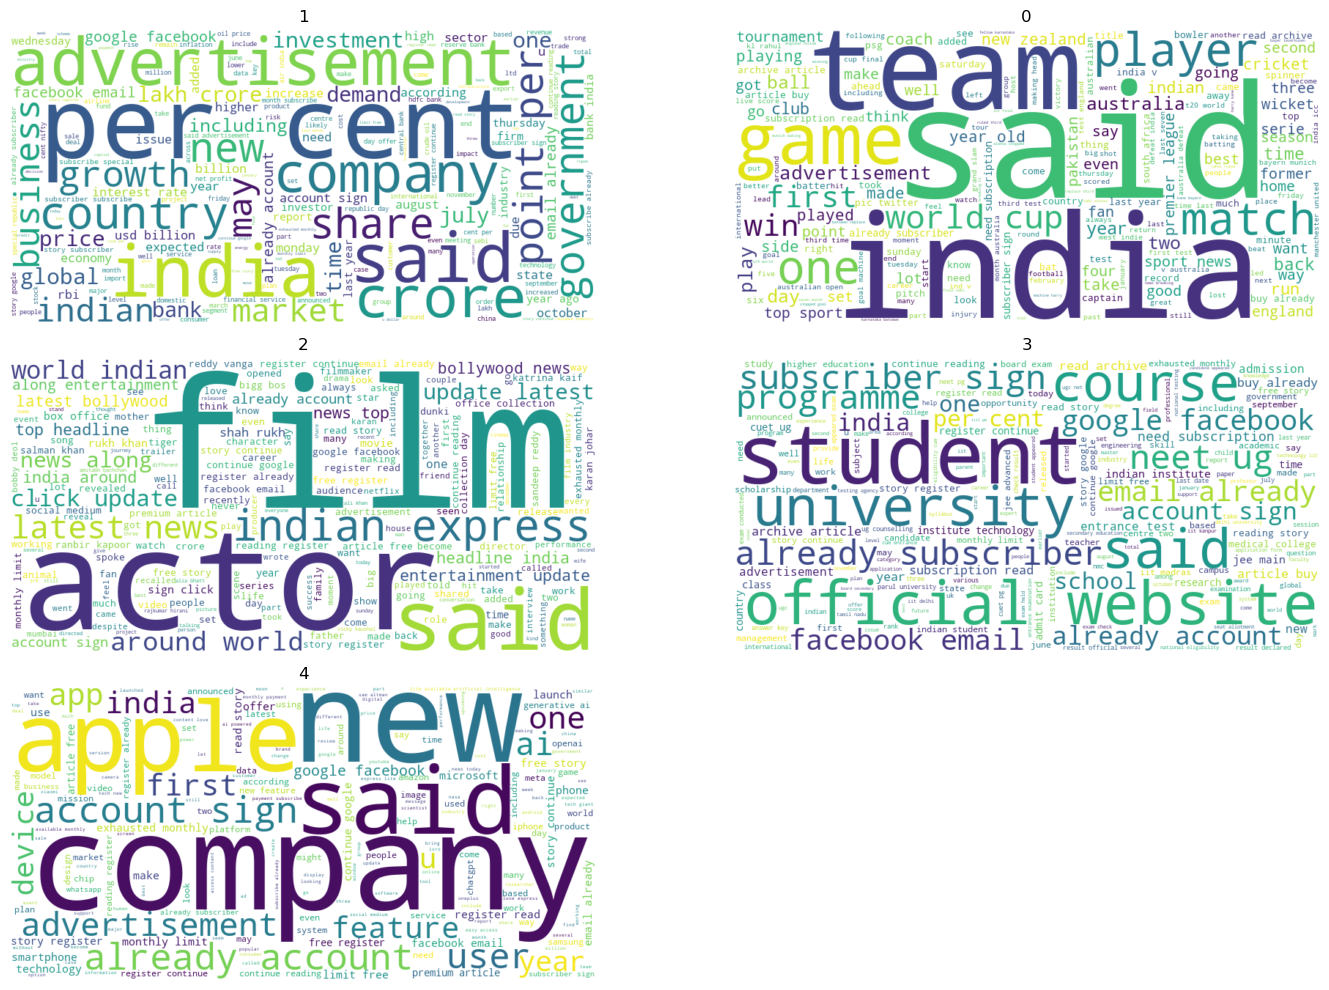

In [127]:
generate_word_clouds(train_df_copy)

The EDA phase has provided a comprehensive overview of our dataset, helping us identify class imbalances and the key characteristics of each news category. By visualizing category distributions, verifying counts, and generating word clouds, we have laid a solid foundation for subsequent modeling efforts, ultimately enhancing the performance of our classification model.

----
<a id="seven"></a>
## Modeling
<a href=#cont>Back to Table of Contents</a>

In [128]:
# training multiple classification models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# instantiating classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train models and store them
model_results = {}
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    model_results[name] = model

In [129]:
# model evaluation using cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation on each model
cv_results = {}
for name, model in model_results.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Display cross-validation results
for name, score in cv_results.items():
    print(f'{name}: Cross-validation Accuracy: {score:.4f}')


Logistic Regression: Cross-validation Accuracy: 0.9862
Naive Bayes: Cross-validation Accuracy: 0.9854
SVM: Cross-validation Accuracy: 0.9877
Random Forest: Cross-validation Accuracy: 0.9745
XGBoost: Cross-validation Accuracy: 0.9770


In [131]:
# hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10]  # Regularization strength
    },
    'SVM': {
        'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Linear or Radial basis function kernel
        'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf' (if kernel='rbf')
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0, 2.0]  # Smoothing parameter (Laplace smoothing)
    }
}

# Perform GridSearchCV for each model
best_models = {}
for name, model in model_results.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_resampled, y_resampled)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Parameters for {name}: {grid_search.best_params_}")

Best Parameters for Logistic Regression: {'C': 10}
Best Parameters for Naive Bayes: {'alpha': 0.1}
Best Parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


---
<a id="eight"></a>
## Evaluation and Validation
<a href=#cont>Back to Table of Contents</a>

In [134]:
# evaluating the best model
from sklearn.metrics import classification_report, accuracy_score

# Evaluate each best model on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_val_vec)
    print(f'Classification Report for {name}:')
    print(classification_report(y_val_split, y_pred))
    print(f'Accuracy: {accuracy_score(y_val_split, y_pred):.4f}')


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       128
           1       0.99      0.96      0.97       224
           2       1.00      1.00      1.00       192
           3       1.00      1.00      1.00       304
           4       0.95      0.98      0.97       256

    accuracy                           0.98      1104
   macro avg       0.99      0.98      0.98      1104
weighted avg       0.98      0.98      0.98      1104

Accuracy: 0.9837
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       128
           1       0.98      0.95      0.96       224
           2       0.99      1.00      1.00       192
           3       1.00      0.99      1.00       304
           4       0.94      0.97      0.96       256

    accuracy                           0.98      1104
   macro avg       0.98     

---
<a id="nine"></a>
## Final Model
<a href=#cont>Back to Table of Contents</a>

In [135]:
# 1. Preprocess and vectorize the training and test data
vectorizer = TfidfVectorizer()  # Example: Bi-grams and Tri-grams

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(train_df_copy['Cleaned_Content'])

# Transform the test data using the same vectorizer (do NOT fit it again)
X_test_vec = vectorizer.transform(test_df_copy['Cleaned_Content'])


# 3. Train Logistic Regression on the entire training dataset
logreg = LogisticRegression()  # Use class_weight='balanced' if you have class imbalance
logreg.fit(X_train_vec, y_train)

# 4. Make predictions on the test dataset
y_pred = logreg.predict(X_test_vec)

# 5. Optionally, convert the numeric predictions back to original labels
#y_pred_original = label_encoder.inverse_transform(y_pred)

# 6. Evaluate model performance on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.27      0.21       400
           1       0.21      0.57      0.30       400
           2       0.19      0.11      0.14       400
           3       0.00      0.00      0.00       400
           4       0.14      0.01      0.01       400

    accuracy                           0.19      2000
   macro avg       0.14      0.19      0.13      2000
weighted avg       0.14      0.19      0.13      2000



---
<a id="ten"></a>
## Conclusion and Future Work
<a href=#cont>Back to Table of Contents</a>

---
<a id="eleven"></a>
## References
<a href=#cont>Back to Table of Contents</a>

[1] Rao, S., Sudarshan, K. and Abhishek (2020) 'News Article Category Predictor', Department of Computer Science and Engineering, Srinivas Institute of Technology, Valachil, India.

[2] Tong, S. and Koller, D. (2000) 'Support vector machine active learning with applications to text classification', in Langley, P. (ed.) Proceedings ICML-00, 17th International Conference on Machine Learning, pp. 999–1006.

[3] McCallum, A. and Nigam, K. (1998) 'A comparison of event models for naive Bayes text classification', in AAAI/ICML-98 Workshop on Learning for Text Categorization.